In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3D
import matplotlib.animation as animation
import sys
sys.path.insert(0,'../')
import params as par


data = np.load('flight_data.npy')
distance = np.load('distance_data.npy')
u_in = np.load('input_data.npy')

In [5]:
def update_lines(num, data, line):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        return line

In [6]:
t = par.time
ref_trajectory = par.ref_trajectory
index = 22

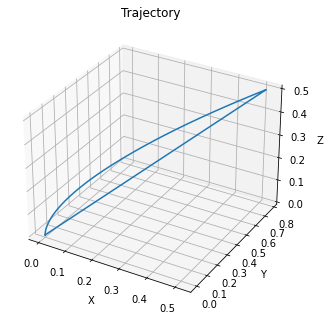

In [7]:
# Attaching 3D axis to the figure
fig1 = plt.figure(num = 1, figsize=(plt.figaspect(1)))
ax = Axes3D(fig1)

x = data[index,:,9]
y = data[index,:,10]
z = data[index,:,11]
data_plot = np.array([x,y,z])

line = ax.plot(x, y, z)[0]

# Setting the axes properties
# ax.set_xlim3d([-50, 50])
# ax.set_ylim3d([-50, 50])
# ax.set_zlim3d([0, 100])

ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_zlabel('Z')

ax.set_title('Trajectory')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig1, update_lines, x.size, fargs=(data_plot, line),
                                interval=50, blit=False)
line_ani.save('./flight.gif', writer='pillow', fps=60)

plt.show()

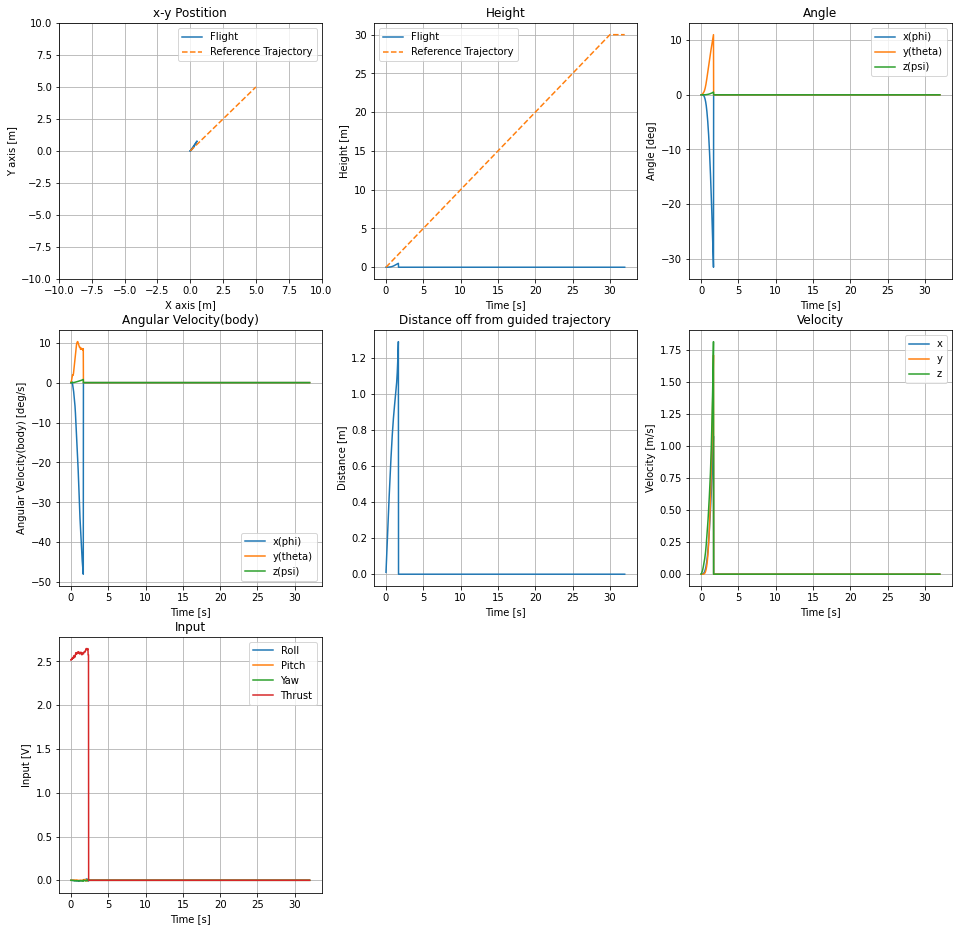

In [8]:
fig2 = plt.figure(num = 2, figsize=(16,16))
ax1 = fig2.add_subplot(3, 3, 1)
plt.plot(data[index,:,9],
            data[index,:,10],
            ref_trajectory[:,0],
            ref_trajectory[:,1],'--')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title('x-y Postition')
plt.xlabel('X axis [m]')
plt.ylabel('Y axis [m]')
plt.legend(['Flight','Reference Trajectory'])
plt.grid()

ax2 = fig2.add_subplot(3, 3, 2)
plt.plot(t,data[index,:,11],
            t,ref_trajectory[:,2],'--')
plt.title('Height')
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.legend(['Flight','Reference Trajectory'])
plt.grid()

ax3 = fig2.add_subplot(3, 3, 3)
plt.plot(t,data[index,:,6]*180/np.pi,
            t,data[index,:,7]*180/np.pi,
            t,data[index,:,8]*180/np.pi)
plt.title('Angle')
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.legend(['x(phi)','y(theta)','z(psi)'])
plt.grid()

ax4 = fig2.add_subplot(3, 3, 4)
plt.plot(t, data[index,:,0]*180/np.pi,
            t, data[index,:,1]*180/np.pi,
            t, data[index,:,2]*180/np.pi)
plt.title('Angular Velocity(body)')
plt.xlabel('Time [s]')
plt.ylabel('Angular Velocity(body) [deg/s]')
plt.legend(['x(phi)','y(theta)','z(psi)'])
plt.grid()

ax5 = fig2.add_subplot(3, 3, 5)
plt.plot(t,distance[index,:])
plt.title('Distance off from guided trajectory')
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]')
plt.grid()

ax6 = fig2.add_subplot(3, 3, 6)
plt.plot(t, data[index,:,3],
            t, data[index,:,4],
            t, data[index,:,5])
plt.title('Velocity')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend(['x','y','z'])
plt.grid()

ax7 = fig2.add_subplot(3, 3, 7)
plt.plot(t, u_in[index,:,0],
            t, u_in[index,:,1],
            t, u_in[index,:,2],
            t, u_in[index,:,3])
plt.xlabel('Time [s]')
plt.ylabel('Input [V]')
plt.title('Input')
plt.legend(['Roll','Pitch','Yaw','Thrust'])
plt.grid()

fig2.savefig('./flight_data.png')